<h2>Desafio 3 - Machine Learning</h2>

<h4>Objetivo</h4>
Construir un modelo de clasificación (Aprendizaje supervisado> clasificación) a partir de un dataset seleccionado.

<h3>Grupo 7</h3>
<ul>
    <li>Ignacio Mendieta</li>
    <li>Laura Jazmín Chao</li>
    <li>Juan Nicolás Capistrano</li>
    <li>Betiana Srur</li>
    <li>Marecelo Carrizo</li>
    
</ul>
<h3> Clasificación

<a id="section_toc"></a> 
<h2> Tabla de Contenidos </h2>

[Librerías](#section_import)

[Dataset](#section_dataset)

[Selección de géneros](#section_genre_selection)

[Exploración de palabras representativas](#section_words)

[Nubes de palabras](#section_wordcloud)

[Encoder de targets](#section_ordinalEncoder)

[Stemmer](#section_stemmer)

[División de sets de entrenamiento y testeo](#section_train_test_split)

[Primera prueba de clasificación](#section_clf_1)

[Pipeline y GridSearch](#section_clf_pipeline)

$\hspace{.5cm}$[1. Logistic Regression](#section_logreg)

$\hspace{.5cm}$[2. Mulyinomial NB](#section_multiNB)


<a id="section_import"></a> 
<h3>Librerías</h3>

[volver a TOC](#section_toc)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import unidecode
from nltk.corpus import stopwords 
stop_words = stopwords.words('english');

from wordcloud import WordCloud, STOPWORDS

In [2]:
pd.set_option('display.max_columns', 100) # Para mostrar todas las columnas
# pd.set_option('display.max_rows', 100) # Para mostrar todas las filas

<a id="section_dataset"></a> 
<h3>Dataset</h3>

[volver a TOC](#section_toc)

In [3]:
data = pd.read_csv("data/movies_preprocesado.csv", low_memory=False)
data.head()

,description_clean,genre_unique
0,miss jerry the adventures of a female reporter...,romance
1,the story of the kelly gang true story of noto...,biography
2,cleopatra the fabled queen of egypts affair wi...,drama
3,linferno loosely adapted from dantes divine co...,adventure
4,from the manger to the cross or jesus of nazar...,biography


In [4]:
data['genre_unique'].value_counts()

drama          24473
comedy         23103
action         11971
crime           5453
horror          4998
adventure       3486
animation       2045
biography       2022
thriller        1317
romance          730
western          611
family           596
mystery          585
fantasy          486
scifi            410
musical          312
war               98
music             72
history           71
filmnoir          29
sport             16
adult              2
documentary        1
Name: genre_unique, dtype: int64

In [5]:
data.shape

(82887, 2)

In [6]:
data.columns

Index(['description_clean', 'genre_unique'], dtype='object')

<a id="section_genre_selection"></a>
<h3>Selección de géneros</h3>

[volver a TOC](#section_toc)

In [7]:
genres = data['genre_unique'].unique()
genres

array(['romance', 'biography', 'drama', 'adventure', 'crime', 'western',
       'fantasy', 'comedy', 'horror', 'family', 'action', 'mystery',
       'history', 'scifi', 'animation', 'musical', 'music', 'thriller',
       'war', 'filmnoir', 'sport', 'adult', 'documentary'], dtype=object)

In [8]:
mask_filter = (data['genre_unique']=='action') | (data['genre_unique']=='comedy') | (data['genre_unique']=='drama') | (data['genre_unique']=='horror') 
#| (data['genre_unique']=='romance')

mask_filter
data = data.loc[mask_filter, :]

In [9]:
data['genre_unique'].value_counts()

drama     24473
comedy    23103
action    11971
horror     4998
Name: genre_unique, dtype: int64

<a id="section_words"></a>
<h3>Exploración de palabras representativas por género</h3>

[volver a TOC](#section_toc)

In [10]:
# stop_words.extend(list(STOPWORDS))

In [11]:
# stop_words = list(set(stop_words))

In [12]:
stop_words.extend(['young', 'life', 'man', 'find', 'get'])
stop_words.append('family');
stop_words.append('la');
stop_words.append('woman');
stop_words.append('il');
stop_words.append('di');
stop_words.append('young');
stop_words.append('man');
stop_words.append('life');
stop_words.extend(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])

In [13]:
vectorizer=CountVectorizer(stop_words=stop_words)

In [14]:
clases = data['genre_unique'].unique()
words = []

for clase in clases:
    X=vectorizer.fit_transform(data[data['genre_unique']==clase]['description_clean'])
    counts=X.sum(axis=0)
    counts=np.array(counts)
    
    indices=np.argsort(counts)
    valores=np.sort(counts)
    indices=indices[0][::-1]
    valores=valores[0][::-1]
    terms=np.array(vectorizer.get_feature_names())

    print('\n Clase ', clase)
    print(terms[indices[:30]])
    


 Clase  drama
['love' 'story' 'girl' 'new' 'lives' 'father' 'years' 'mother' 'war'
 'wife' 'world' 'old' 'son' 'film' 'home' 'school' 'finds' 'friends'
 'town' 'boy' 'daughter' 'falls' 'day' 'small' 'meets' 'husband' 'time'
 'death' 'city' 'becomes']

 Clase  comedy
['love' 'new' 'friends' 'girl' 'story' 'school' 'comedy' 'old' 'wife'
 'years' 'lives' 'finds' 'film' 'father' 'gets' 'time' 'day' 'town'
 'world' 'home' 'back' 'falls' 'group' 'friend' 'go' 'make' 'help' 'small'
 'son' 'mother']

 Clase  horror
['group' 'house' 'night' 'killer' 'friends' 'new' 'dead' 'home'
 'mysterious' 'horror' 'death' 'girl' 'people' 'town' 'evil' 'years' 'old'
 'haunted' 'soon' 'dark' 'strange' 'film' 'must' 'college' 'finds'
 'couple' 'small' 'school' 'blood' 'back']

 Clase  action
['police' 'war' 'must' 'group' 'new' 'gang' 'world' 'story' 'love' 'cop'
 'gets' 'son' 'take' 'city' 'fight' 'father' 'agent' 'death' 'help'
 'finds' 'crime' 'time' 'revenge' 'team' 'back' 'town' 'years' 'officer'
 'broth

<a id="section_wordcloud"></a>
<h3>Nubes de palabras</h3>

[volver a TOC](#section_toc)

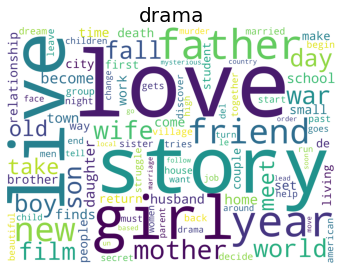

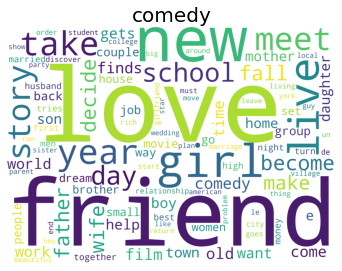

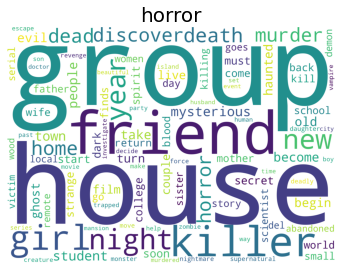

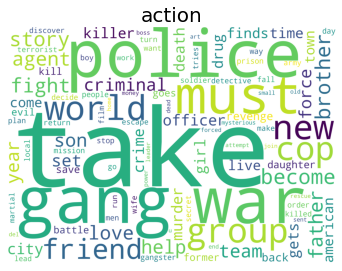

In [15]:
for genre in clases:
    plt.figure(figsize=(20,12.5))
    subset = data[data['genre_unique']==genre]
    text = subset['description_clean'].values
    cloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      collocations=False,
                      width=2500,
                      height=1800,
                      max_words=100).generate(" ".join(text))
    
    plt.subplot(2, 3, 1)
    plt.axis('off')
    plt.title(genre,fontsize=20)
    plt.imshow(cloud)



<a id="section_ordinalEncoder"></a>
<h3>Encoder de targets</h3>

[volver a TOC](#section_toc)

In [16]:
data.head(2)

,description_clean,genre_unique
2,cleopatra the fabled queen of egypts affair wi...,drama
6,quo vadis an epic italian film quo vadis influ...,drama


In [17]:
#se puede usar LabelEncoder tambien!
from sklearn.preprocessing import OrdinalEncoder
#Cuando le paso las categorías como paramétro me tira error The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
ord_enc = OrdinalEncoder()
data["target_genre"] = ord_enc.fit_transform(data[["genre_unique"]])

data.sample(3)

,description_clean,genre_unique,target_genre
46475,nafaka sarajevo 1992 they are called ahmed lan...,action,0.0
5935,il grande teschio bunuels first comeback film ...,comedy,1.0
75993,tori garu toriyama yukina is finally in at the...,comedy,1.0


<a id="section_stemmer"></a>
<h3>Stemmer</h3>

[volver a TOC](#section_toc)

In [18]:
from nltk.stem.snowball import SnowballStemmer

In [19]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence



In [20]:
data['description_clean'] = data['description_clean'].apply(stemming)
data.head()

,description_clean,genre_unique,target_genre
2,cleopatra the fabl queen of egypt affair with ...,drama,2.0
6,quo vadi an epic italian film quo vadi influen...,drama,2.0
7,richard iii richard of gloucest use manipul an...,drama,2.0
8,atlanti after dr friedrich wife becom mental u...,drama,2.0
11,ma lamor mio non muor lesli swayn an adventur ...,drama,2.0


<a id="section_train_test_split"></a>
<h3>División de sets de entrenamiento y testeo</h3>

[volver a TOC](#section_toc)

In [21]:
train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)
train_text = train['description_clean']
test_text = test['description_clean']

In [22]:
train_text.head()

78514    monster base on the bestsel book of the same n...
26635    chiu kup hok hau ba wong ryu dhalsim and vega ...
12257    the black klansman after a black man daughter ...
74031    delib two young peopl figur out how to shape t...
17225    marecku podejt mi pero older group of worker a...
Name: description_clean, dtype: object

In [23]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,3),max_features=20000, stop_words=stop_words)
vectorizer.fit(train_text)

TfidfVectorizer(max_features=20000, min_df=10, ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [24]:
X_train = vectorizer.transform(train_text)
X_test = vectorizer.transform(test_text)
y_train = train['genre_unique']
y_test = test['genre_unique']

<a id="section_clf_1"></a>
<h3>Primera prueba de clasificación</h3>

[volver a TOC](#section_toc)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [26]:
genres = data['genre_unique'].unique()
len(genres)

4

In [27]:
classifier_log = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', verbose=1, n_jobs=-1)
classifier_log.fit(X_train, y_train)
prediction = classifier_log.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Test accuracy is 0.6331852922949803


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.7s finished


In [28]:
print(classification_report(y_test, prediction, zero_division=1))

              precision    recall  f1-score   support

      action       0.69      0.59      0.64      3645
      comedy       0.64      0.65      0.64      6965
       drama       0.61      0.68      0.64      7262
      horror       0.61      0.43      0.51      1492

    accuracy                           0.63     19364
   macro avg       0.64      0.59      0.61     19364
weighted avg       0.64      0.63      0.63     19364



In [29]:
classifier_log.classes_

array(['action', 'comedy', 'drama', 'horror'], dtype=object)

In [30]:
print(confusion_matrix(y_test, prediction))

[[2166  573  802  104]
 [ 384 4522 1919  140]
 [ 418 1752 4929  163]
 [ 156  254  438  644]]


In [31]:
conf_matrix = confusion_matrix(y_test, prediction)
conf_mat_df = pd.DataFrame(data=conf_matrix, 
                           index=classifier_log.classes_, 
                           columns=classifier_log.classes_)


In [32]:
conf_mat_df

,action,comedy,drama,horror
action,2166,573,802,104
comedy,384,4522,1919,140
drama,418,1752,4929,163
horror,156,254,438,644


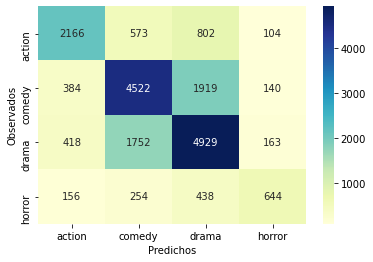

In [33]:
heatmap = sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predichos") 
plt.ylabel("Observados")
plt.show()

## SVC

In [34]:
# from sklearn.svm import SVC
# svc = SVC(kernel = 'rbf')
# svc.fit(X_train, y_train)

# y_pred_svc = svc.predict(X_test)

# print("Accuracy of Support Vector Classifier is: {}%".format(accuracy_score(y_test, y_pred_svc) * 100))
# print("Confusion Matrix of Support Vector Classifier is: \n{}".format(confusion_matrix(y_test, y_pred_svc)))
# print("{}".format(classification_report(y_test, y_pred_svc)))

<a id="section_clf_pipeline"></a>
<h3>Pipeline y Gridsearch</h3>

[volver a TOC](#section_toc)

<a id="section_logreg"></a>
<h4>Logistic Regression</h4>

[volver a TOC](#section_toc)

In [35]:
data_x = data['description_clean']
data_y = data['genre_unique']
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(data_x, data_y, random_state=42, test_size=0.33, shuffle=True)

In [36]:

pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)), 
                     ('log', LogisticRegression())])

parameters = {'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'log__penalty': ['l2'],
              'log__C': [0.01, 0.1, 1],
              "log__class_weight": ['balanced', None],
              "log__solver" : ['sag', 'lbfgs']
}

# skf=StratifiedKFold(n_splits=3, random_state=3, shuffle=True)


In [37]:
grid = GridSearchCV(
    pipeline, parameters, cv=3, n_jobs=2, verbose=1)
grid.fit(X_train_pipe, y_train_pipe)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  4.0min
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed: 20.7min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
 

In [38]:
print("Best parameters set:")
grid.best_estimator_.steps

Best parameters set:


[('tfidf',
  TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                              'ourselves', 'you', "you're", "you've", "you'll",
                              "you'd", 'your', 'yours', 'yourself', 'yourselves',
                              'he', 'him', 'his', 'himself', 'she', "she's",
                              'her', 'hers', 'herself', 'it', "it's", 'its',
                              'itself', ...])),
 ('log', LogisticRegression(C=1, solver='sag'))]

In [39]:
print("Applying best classifier on test data:")
predictions = grid.best_estimator_.predict(X_test_pipe)

print(classification_report(y_test_pipe, predictions, target_names=genres))

Applying best classifier on test data:
              precision    recall  f1-score   support

       drama       0.70      0.59      0.64      4002
      comedy       0.64      0.64      0.64      7638
      horror       0.61      0.69      0.65      8009
      action       0.61      0.42      0.50      1651

    accuracy                           0.63     21300
   macro avg       0.64      0.59      0.61     21300
weighted avg       0.64      0.63      0.63     21300



In [40]:
print("Accuracy = ",accuracy_score(y_test_pipe,predictions))
print("\n")

Accuracy =  0.6345070422535212




<a id="section_multiNB"></a>
<h4>Multinomial NB</h4>

[volver a TOC](#section_toc)

In [41]:
pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', MultinomialNB(
        fit_prior=True, class_prior=None))
])
parameters1 = {
#     'tfidf__max_df': [50, 100, 200],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'tfidf__norm':['l1', 'l2']
    'clf__alpha': (1e-2, 1e-3)
}

In [42]:
grid1 = GridSearchCV(
    pipeline1, parameters1, cv=3, n_jobs=2, verbose=1)
grid1.fit(X_train_pipe, y_train_pipe)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:   55.5s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
 

In [43]:
print("Best parameters set:")
grid1.best_estimator_.steps

Best parameters set:


[('tfidf',
  TfidfVectorizer(ngram_range=(1, 2),
                  stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                              'ourselves', 'you', "you're", "you've", "you'll",
                              "you'd", 'your', 'yours', 'yourself', 'yourselves',
                              'he', 'him', 'his', 'himself', 'she', "she's",
                              'her', 'hers', 'herself', 'it', "it's", 'its',
                              'itself', ...])),
 ('clf', MultinomialNB(alpha=0.01))]

In [44]:
grid1.best_score_

0.6004162330905306

In [45]:
print("Applying best classifier on test data:")
best_clf = grid1.best_estimator_
predictions1 = best_clf.predict(X_test_pipe)

print(classification_report(y_test_pipe, predictions1, target_names=genres))

Applying best classifier on test data:
              precision    recall  f1-score   support

       drama       0.67      0.60      0.63      4002
      comedy       0.60      0.60      0.60      7638
      horror       0.58      0.64      0.61      8009
      action       0.59      0.45      0.51      1651

    accuracy                           0.60     21300
   macro avg       0.61      0.57      0.59     21300
weighted avg       0.61      0.60      0.60     21300



In [46]:
print("Accuracy = ",accuracy_score(y_test_pipe, predictions1))
print("\n")

Accuracy =  0.6036150234741784


